##data exploration

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
diamonds = pd.read_csv(r'/content/diamonds.csv')
# diamonds.drop('Unnamed: 0', inplace=True, axis=1)
diamonds.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
diamonds_num = diamonds.drop(['cut','color', 'clarity'], axis=1)
diamonds_num.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
diamonds_num.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [ ]:
diamonds['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [ ]:
diamonds['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [ ]:
diamonds['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

## data visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d6c91e7d0>,
      dtype=object)

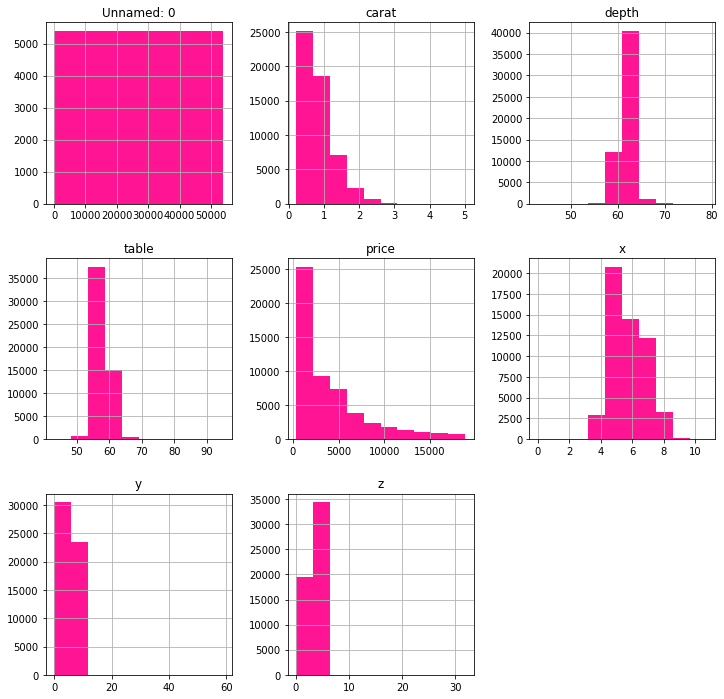

In [ ]:
diamonds.hist(figsize=(12,12), color='deeppink')

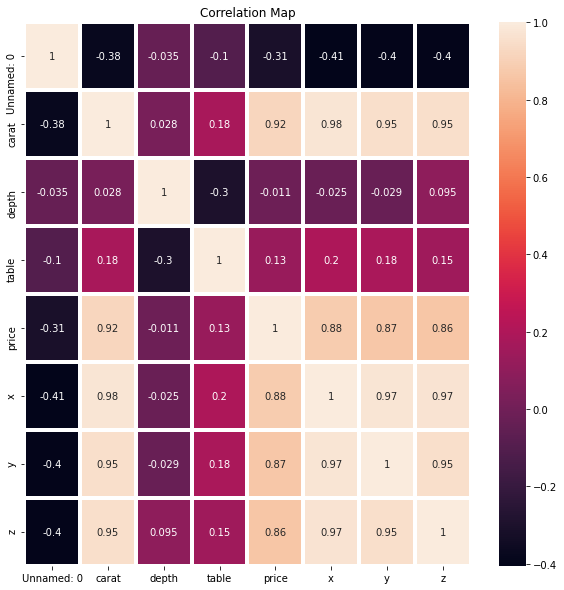

In [ ]:
corr = diamonds.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation Map')
sns.heatmap(corr, linewidth=3.1,annot=True)

<Figure size 720x720 with 0 Axes>

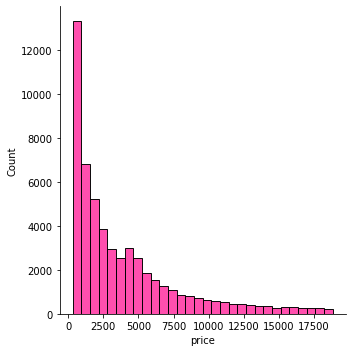

In [ ]:
plt.figure(figsize=(10,10))
sns.displot(diamonds.price, kde = False , bins= 30, color='deeppink')

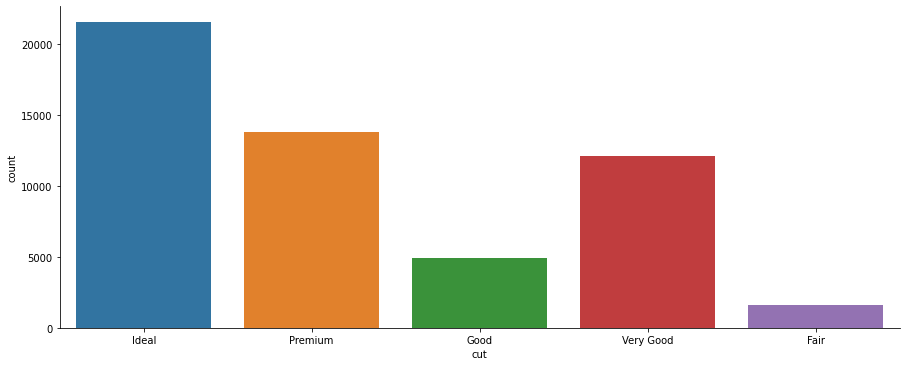

In [ ]:
sns.catplot(x='cut', data=diamonds , kind='count',aspect=2.5)

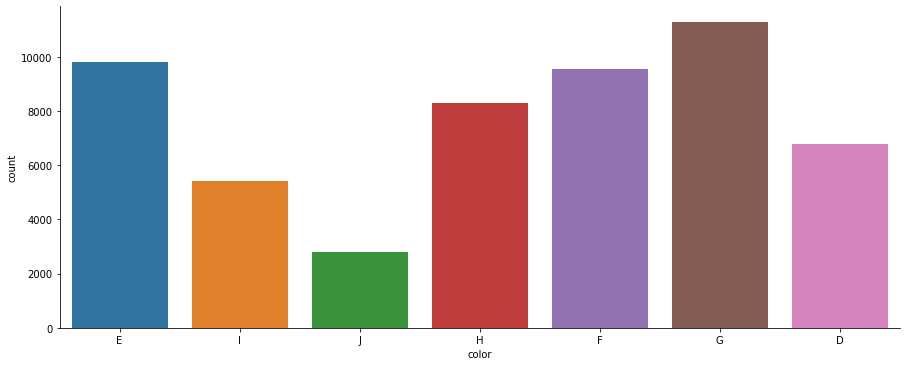

In [ ]:
sns.catplot(x='color', data=diamonds , kind='count',aspect=2.5)

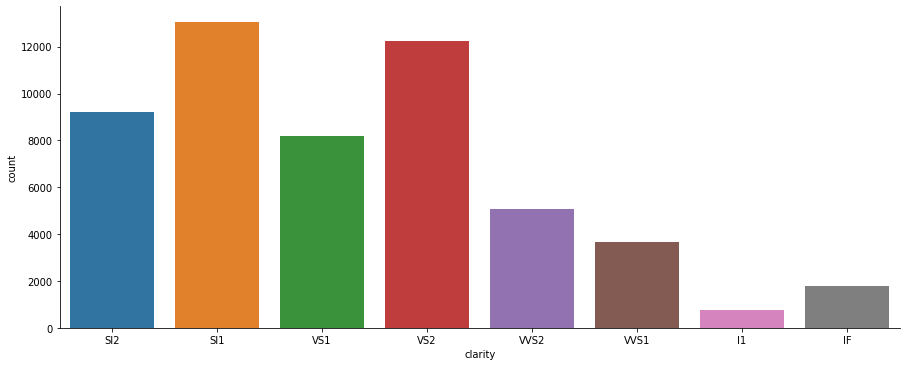

In [ ]:
sns.catplot(x='clarity', data=diamonds , kind='count',aspect=2.5)

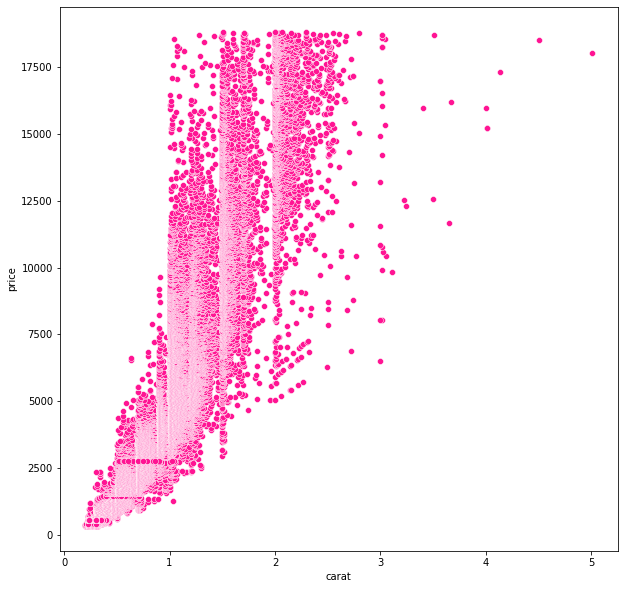

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=diamonds, x='carat', y='price', color= 'deeppink')

## data cleaning 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
diamonds['volume'] = diamonds['x'] * diamonds['y'] * diamonds['z']
#diamonds.head()

In [ ]:
diamonds.drop(['x','y','z'], axis=1, inplace= True)

In [ ]:
df1 = diamonds.drop("Unnamed: 0", axis = 1)
for col in df1.select_dtypes("object"):
    print(col,len(df1[col].unique()), df1[col].unique())
    print("")

cut 5 ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']

color 7 ['E' 'I' 'J' 'H' 'F' 'G' 'D']

clarity 8 ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']



In [ ]:
# df2 = df1.copy()
# df2["cut"] = df2.replace({"Fair": 0, "Good": 1, "Very Good": 2, "Premium": 3, "Ideal": 4})

# df2["clarity"] = df2.replace({"I1": 0, "SI2": 1, "SI1": 2, "VS2": 3, "VS1": 4, "VVS2": 5, "VVS1": 6, "IF": 7})
diamonds_labels = diamonds['price'].copy()
diamonds = diamonds.drop(["Unnamed: 0","price"], axis=1)
diamonds_num = diamonds.drop(['cut','color', 'clarity'], axis=1)
num_attributes = list(diamonds_num)
cut_attribute = ["cut"]
clarity_attribute = ["clarity"]
color_attribute = ["color"]
full_transformer= ColumnTransformer([
                                  ('std_scaler', StandardScaler(),num_attributes),
                                  ('ordinal_encoder_cut',OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]),cut_attribute),
                                  ('ordinal_encoder_clarity', OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]), clarity_attribute),
                                  ('ordinal_encoder_color' , OrdinalEncoder(categories=[['D','E','F','G','H','I','J']] ), color_attribute)
])
diamonds_prepared = full_transformer.fit_transform(diamonds) 
diamonds_prepared[0:5]

array([[-1.19816781, -0.17409151, -1.09967199, -1.17129422,  4.        ,
         1.        ,  1.        ],
       [-1.24036129, -1.36073849,  1.58552871, -1.21853297,  3.        ,
         2.        ,  1.        ],
       [-1.19816781, -3.38501862,  3.37566251, -1.17289363,  1.        ,
         4.        ,  1.        ],
       [-1.07158736,  0.45413336,  0.24292836, -1.06237224,  3.        ,
         3.        ,  5.        ],
       [-1.02939387,  1.08235823,  0.24292836, -0.99600761,  1.        ,
         1.        ,  6.        ]])

In [ ]:
diamonds_prepared_df = pd.DataFrame(diamonds_prepared,
                                    columns = num_attributes + cut_attribute + clarity_attribute + color_attribute)
diamonds_prepared_df.head()

,carat,depth,table,volume,cut,clarity,color
0,-1.198168,-0.174092,-1.099672,-1.171294,4.0,1.0,1.0
1,-1.240361,-1.360738,1.585529,-1.218533,3.0,2.0,1.0
2,-1.198168,-3.385019,3.375663,-1.172894,1.0,4.0,1.0
3,-1.071587,0.454133,0.242928,-1.062372,3.0,3.0,5.0
4,-1.029394,1.082358,0.242928,-0.996008,1.0,1.0,6.0


Remove outliers

In [ ]:
import scipy.stats as stats 

In [ ]:
# df3 = df2.drop(["color", "clarity", "cut"],axis=1)

z_scores = stats.zscore(diamonds_prepared_df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
filtered_entries
diamonds_prepared_df = diamonds_prepared_df[filtered_entries]
diamonds_labels = diamonds_labels[filtered_entries]
diamonds_prepared_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52550 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    52550 non-null  float64
 1   depth    52550 non-null  float64
 2   table    52550 non-null  float64
 3   volume   52550 non-null  float64
 4   cut      52550 non-null  float64
 5   clarity  52550 non-null  float64
 6   color    52550 non-null  float64
dtypes: float64(7)
memory usage: 3.2 MB


In [ ]:
# X = diamonds_prepared_df.drop(["price"], axis = 1) 
# y = diamonds_prepared_df["price"]
X = diamonds_prepared_df
y = diamonds_labels
# sc = StandardScaler()
# X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 45)


Select and train a model


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def evaluate(true,predicted,message = "Test Set"):
    MSE = mean_squared_error(true,predicted,squared = True)
    MAE = mean_absolute_error(true,predicted)
    RMSE = mean_squared_error(true,predicted,squared = False)
    
    print(message)
    print("MSE:", MSE)
    print("MAE:", MAE)
    print("RMSE:", RMSE)
    print()

def display_scores(scores,model):
  print(f"     {model} validation ")
  print("Scores:", scores)
  print("Root Mean squared error:", scores.mean())
  print("Standard deviation:", scores.std())
  print()

# Train Models

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

SVM = svm.SVR().fit(X_train, y_train) 

RFReg = RandomForestRegressor(random_state = 0).fit(X_train, y_train)

linreg = LinearRegression()
linreg_model = linreg.fit(X_train, y_train)

regress_dtree= DecisionTreeRegressor(random_state=1)
dtree_model = regress_dtree.fit(X_train,y_train)

knn = KNeighborsClassifier(n_neighbors=1)
knn_model = knn.fit(X_train,y_train)

In [ ]:
print("Random Forest Regressor") 
predicted_y_train = RFReg.predict(X_train)
evaluate(y_train,predicted_y_train,"    Training Set")

print("Support Vector Machine") 
predicted_y_train = SVM.predict(X_train)
evaluate(y_train,predicted_y_train,"    Training Set")

print("Linear Regression") 
predicted_y_train = linreg.predict(X_train)
evaluate(y_train,predicted_y_train,"    Training Set")

print("Decision Tree Regression")
predicted_y_train = dtree_model.predict(X_train)
evaluate(y_train,predicted_y_train,"    Training Set")

print("K Nearset Neighbor")
predicted_y_train_k = knn_model.predict(X_train)
evaluate(y_train,predicted_y_train,"    Training Set")

Random Forest Regressor
    Training Set
MSE: 38860.6465913013
MAE: 103.60018419785929
RMSE: 197.13103913717217

Support Vector Machine
    Training Set
MSE: 7919203.855097151
MAE: 1513.5730266423752
RMSE: 2814.1080034528086

Linear Regression
    Training Set
MSE: 1370809.8232883147
MAE: 844.0006271518904
RMSE: 1170.8158793287332

Decision Tree Regression
    Training Set
MSE: 982.2888179058492
MAE: 12.078555570658331
RMSE: 31.341487168062866

K Nearset Neighbor
    Training Set
MSE: 982.2888179058492
MAE: 12.078555570658331
RMSE: 31.341487168062866



# Validation

In [ ]:
# validate Random Forest Regressor
RF_scores = cross_val_score(RFReg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
RF_rmse_scores = np.sqrt(-RF_scores)
display_scores(RF_rmse_scores,"Random Forest Regressor")

# validate Support Vector Machine
SVM_scores = cross_val_score(SVM, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-SVM_scores)
display_scores(svm_rmse_scores,"Support Vector Machine")

# validate Linear Regression
linr_scores = cross_val_score(linreg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
linr_rmse_scores = np.sqrt(-linr_scores)
display_scores(linr_rmse_scores,"Linear Regression")

# validate Decision Tree Regression
dtree_scores = cross_val_score(regress_dtree, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
dtree_rmse_scores = np.sqrt(-dtree_scores)
display_scores(dtree_rmse_scores,"Decision Tree Regression")

# validate K Nearset Neighbor
knn_scores = cross_val_score(knn, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
knn_rmse_scores = np.sqrt(-knn_scores)
display_scores(knn_rmse_scores,"K Nearset Neighbor")

     Random Forest Regressor validation 
Scores: [537.20652183 570.32599181 540.6624197  519.55239979 511.68668253
 503.79082675 513.80482355 502.0680367  534.77460966 527.03038218]
Root Mean squared error: 526.0902694488013
Standard deviation: 19.607374599866677

     Support Vector Machine validation 
Scores: [2817.35472838 2951.4053786  2945.38336013 2982.24277767 2983.84544058
 2989.76992557 2886.11078919 2748.14549017 2909.65882854 2869.81156317]
Root Mean squared error: 2908.3728281989843
Standard deviation: 75.4594392163723

     Linear Regression validation 
Scores: [1151.11932898 1153.53428977 1196.70900618 1181.22629638 1181.80016306
 1203.97282095 1176.22731581 1118.83678608 1190.45535844 1159.16991238]
Root Mean squared error: 1171.3051278035296
Standard deviation: 24.362941790468614

     Decision Tree Regression validation 
Scores: [713.59554472 752.88090501 736.90579171 687.40406822 679.74126513
 698.03477738 676.6136876  709.26715283 712.33915194 670.43677223]
Root Mean

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


     K Nearset Neighbor validation 
Scores: [859.08252087 900.83453743 913.30692873 842.98447556 901.39916188
 874.63671477 826.35446462 882.79478776 852.55876804 850.4899458 ]
Root Mean squared error: 870.4442305457203
Standard deviation: 27.26572923721974



## Testing

In [ ]:
print("Random Forest Regressor") 
predicted_y_test = RFReg.predict(X_test)
evaluate(y_test,predicted_y_test,"    Test Set")

print("Support Vector Machine") 
predicted_y_test = SVM.predict(X_test)
evaluate(y_test,predicted_y_test,"    Test Set")

print("Linear Regression") 
predicted_y_test = linreg.predict(X_test)
evaluate(y_test,predicted_y_test,"    Test Set")

print("Decision Tree Regression")
predicted_y_test = dtree_model.predict(X_test)
evaluate(y_test,predicted_y_test,"    Test Set")

print("K Nearset Neighbor")
predicted_y_test_k = knn_model.predict(X_test)
evaluate(y_test,predicted_y_test,"    Test Set")


Random Forest Regressor
    Test Set
MSE: 258647.5522164276
MAE: 264.50487621010984
RMSE: 508.57403808730504

Support Vector Machine
    Test Set
MSE: 7853061.9716119645
MAE: 1509.3788490749012
RMSE: 2802.3315242154995

Linear Regression
    Test Set
MSE: 1359022.3745276358
MAE: 840.6513699081141
RMSE: 1165.771150152394

Decision Tree Regression
    Test Set
MSE: 465941.1028138985
MAE: 341.63940162807904
RMSE: 682.5987861210263

K Nearset Neighbor
    Test Set
MSE: 465941.1028138985
MAE: 341.63940162807904
RMSE: 682.5987861210263



# Accuracy

In [ ]:
print("Support Vector Machine")
print("Testing Accuracy:",(SVM.score(X_test, y_test)))
print("Training Accuracy:",(SVM.score(X_train, y_train)))
print("\n")

print("Random Forest Regressor") 
print("Testing Accuracy:",(RFReg.score(X_test, y_test)))
print("Training Accuracy:",(RFReg.score(X_train, y_train)))
print("\n")

print("Linear Regression") 
print("Testing Accuracy:",(linreg_model.score(X_test, y_test)))
print("Training Accuracy:",(linreg_model.score(X_train, y_train)))
print("\n")

print("Decision Tree Regression")
print("Testing Accuracy:",(dtree_model.score(X_test, y_test)))
print("Training Accuracy:",(dtree_model.score(X_train, y_train)))
print("\n")

print("K Nearset Neighbor")
print("Testing Accuracy:",(knn_model.score(X_test, y_test)))
print("Training Accuracy:",(knn_model.score(X_train, y_train)))
print("\n")

Support Vector Machine
Testing Accuracy: 0.46796404669887937
Training Accuracy: 0.4720301217513977


Random Forest Regressor
Testing Accuracy: 0.9824769246047065
Training Accuracy: 0.9974091775859177


Linear Regression
Testing Accuracy: 0.9079277908154664
Training Accuracy: 0.9086087050230833


Decision Tree Regression
Testing Accuracy: 0.9684330239957494
Training Accuracy: 0.9999345112315475


K Nearset Neighbor
Testing Accuracy: 0.031525531240088805
Training Accuracy: 0.911376919940193




# Fine Tune


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
    ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this t

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.139166,0.005747,0.010971,0.000979,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",0.965348,0.967813,0.969800,0.968204,0.965395,0.967312,0.001719,15,0.990811,0.990929,0.991486,0.990752,0.991425,0.991081,3.119477e-04
1,0.449622,0.010075,0.033278,0.003140,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",0.973707,0.976167,0.977712,0.976670,0.975289,0.975909,0.001351,9,0.995476,0.995271,0.995441,0.995531,0.995479,0.995439,8.902808e-05
2,1.315687,0.019619,0.092361,0.006146,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",0.977626,0.978608,0.980794,0.979558,0.978581,0.979033,0.001072,4,0.996872,0.996699,0.996671,0.996709,0.996877,0.996766,8.978711e-05
3,0.209192,0.007092,0.010874,0.000764,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",0.972819,0.973806,0.977256,0.974684,0.974597,0.974632,0.001474,12,0.993942,0.993527,0.993513,0.993694,0.993629,0.993661,1.555604e-04
4,0.692272,0.010519,0.031108,0.001786,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",0.976696,0.979622,0.980244,0.979934,0.978203,0.978940,0.001322,5,0.996304,0.996318,0.996117,0.996214,0.996330,0.996257,8.104567e-05
5,2.043274,0.007490,0.092619,0.008575,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",0.978798,0.980980,0.982662,0.982150,0.980343,0.980987,0.001369,1,0.997129,0.997017,0.997017,0.997007,0.997166,0.997067,6.666750e-05
6,0.282924,0.006757,0.010869,0.000990,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",0.973623,0.976003,0.976292,0.976765,0.974567,0.975450,0.001172,10,0.994054,0.993458,0.993985,0.993911,0.993990,0.993880,2.156431e-04
7,0.921612,0.018447,0.028063,0.000392,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",0.976982,0.979409,0.980970,0.979642,0.978708,0.979142,0.001305,3,0.996682,0.996215,0.996426,0.996420,0.996406,0.996430,1.485980e-04
8,2.777431,0.016468,0.090145,0.006773,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",0.978065,0.981038,0.982099,0.981470,0.980222,0.980579,0.001397,2,0.997149,0.997060,0.997010,0.997090,0.997149,0.997091,5.335127e-05
9,0.006647,0.000112,0.000000,0.000000,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'max_features': 2, 'n_estimators': 3}
nan {'max_features': 2, 'n_estimators': 10}
nan {'max_features': 2, 'n_estimators': 30}
nan {'max_features': 4, 'n_estimators': 3}
nan {'max_features': 4, 'n_estimators': 10}
nan {'max_features': 4, 'n_estimators': 30}
nan {'max_features': 6, 'n_estimators': 3}
nan {'max_features': 6, 'n_estimators': 10}
nan {'max_features': 6, 'n_estimators': 30}
nan {'max_features': 8, 'n_estimators': 3}
nan {'max_features': 8, 'n_estimators': 10}
nan {'max_features': 8, 'n_estimators': 30}
nan {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
nan {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
nan {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
nan {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
nan {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
nan {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
